# What is Ansible ?

* at its core its a task execution engine.
* Automate one or more actions to be performed on one or more targets 
* Target can be local and remote (preffered) 
* taks are defined in a simple to read text file 
* support scalability
* Opensource project initially, aquared by redhat https://www.ansible.com/community
* written in Python, task are specified in YAML 

## Model of operation  

### Linear Strategy 
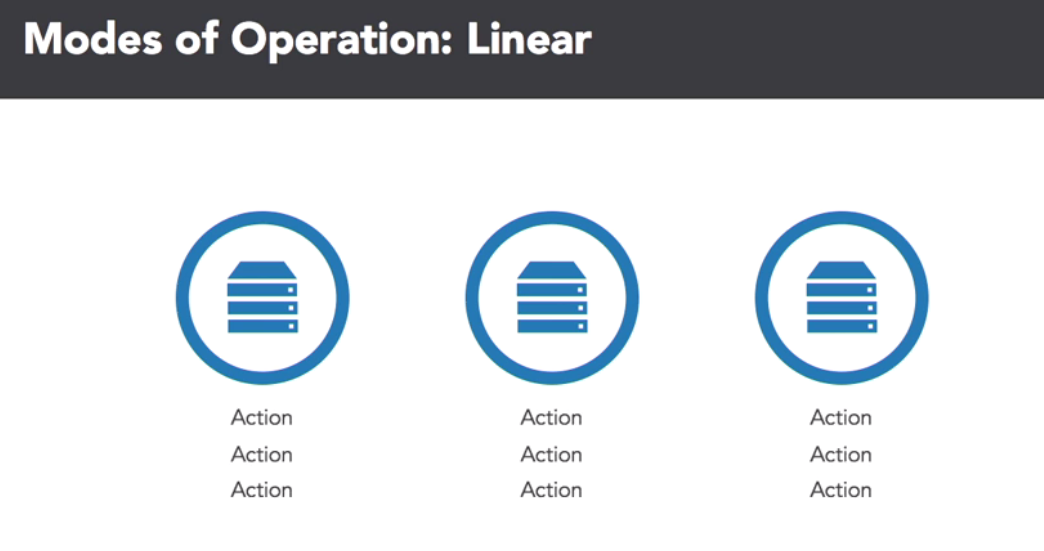

* default model of execution 
* set of machine completes one task, next tasks is given
* useful for linearly dependent tasks

### Serial Strategy 
* Run all tasks in one host then move to next host 

### Free Strategy 
* Run as fast as you can 
* introduced in Ansible 2.0 
* each host performs a task sequence individually regardless of others 
* use to reduce interruption of task execution by other hosts (bottleneck removal)
* not useful in cases where hosts are coupled in execution 

## low cost fleet management
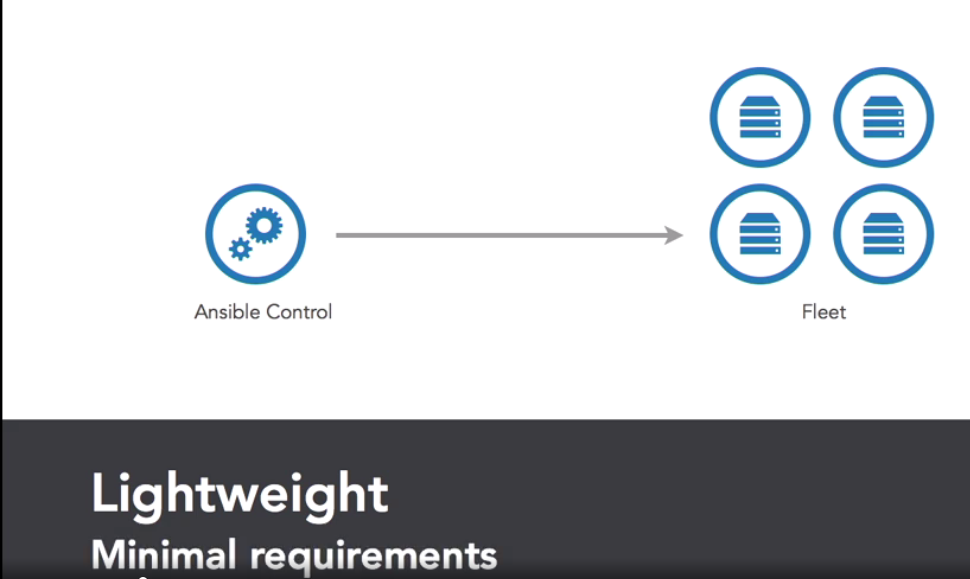

* Agentless fleet management 
* Communication to target host is done using SSH 
* Non persistent : State is determined in runtime 
* SInce stateless, thus can be run from any system, having access rights to the target system. 
* __Required Components__ 
    1. Inventory : Set of potential targets 
    2. state directives : single or multiple
    3. credentals : to eshtablish communication sessions 

## Get started with ansible 
* ansible must be explecitly install on the control machinne 
* python 2.3 /3+ is neeeded 
* No windows support 

### Setting up the environment 
* Install docker engine in a Ubuntu VM, we call the __Manager__
    ```
    sudo curl https://get.docker.com | sh
    ```
* Create 3 ubuntu docker containers. the given command must run seperatly on three shell. we call the containers __worker__
    ```
    docker run -it ubuntu
    ```
* on each container install some basic packages 
    ```
    apt -y update 
    apt -y install iptools-ping net-tools openssh-server
    ```
* Notedown the IP of all workers 
    * worker 1 : 172.17.0.2
    * woerkr 2 : 172.17.0.3
    * worker 3 : 172.17.0.4
    
* make sure workers get IP address of same range, and pingable from the manager.
    ```
    rishi@ubuntu:~$ ping -c1 172.17.0.2
    PING 172.17.0.2 (172.17.0.2) 56(84) bytes of data.
    64 bytes from 172.17.0.2: icmp_seq=1 ttl=64 time=0.061 ms

    --- 172.17.0.2 ping statistics ---
    1 packets transmitted, 1 received, 0% packet loss, time 0ms
    rtt min/avg/max/mdev = 0.061/0.061/0.061/0.000 ms
    
    rishi@ubuntu:~$ ping -c1 172.17.0.3
    PING 172.17.0.3 (172.17.0.3) 56(84) bytes of data.
    64 bytes from 172.17.0.3: icmp_seq=1 ttl=64 time=0.110 ms

    --- 172.17.0.3 ping statistics ---
    1 packets transmitted, 1 received, 0% packet loss, time 0ms
    rtt min/avg/max/mdev = 0.110/0.110/0.110/0.000 ms
    
    rishi@ubuntu:~$ ping -c1 172.17.0.4
    PING 172.17.0.4 (172.17.0.4) 56(84) bytes of data.
    64 bytes from 172.17.0.4: icmp_seq=1 ttl=64 time=0.063 ms

    --- 172.17.0.4 ping statistics ---
    1 packets transmitted, 1 received, 0% packet loss, time 0ms
    rtt min/avg/max/mdev = 0.063/0.063/0.063/0.000 ms
    ```
    
* Take a copy of image with name `ans_worker`
    ```
    docker commit [name] ans_worker
    ```
* Finally, check the running containers from manager 
    ```
    docker ps
    CONTAINER ID   IMAGE        COMMAND         CREATED          STATUS          PORTS       NAMES
    cf9b6515ab03   ans_worker   "/bin/bash"     15 seconds ago   Up 14 seconds               worker3
    71c55659b5ff   ans_worker   "/bin/bash"     22 seconds ago   Up 21 seconds               worker2
    59a5698cd4bd   ans_worker   "/bin/bash"     36 seconds ago   Up 35 seconds               worker1

    ```
* the manager must have SSH-server and Python3 installed 
    ```
    sudo apt -y install openssh-server python3
    ```
* Install ansible 
    ```
    sudo apt -y install ansible
    ```
* verify ansible 
    ```
     which ansible
     
    /usr/bin/ansible
    ```
* check version
    ```
    ansible --version
    
    ansible 2.0.0.2
      config file = /etc/ansible/ansible.cfg
      configured module search path = Default w/o overrides
    ```

### isntalling ansible using python virtual environment 
* install basic packages 
    ```
    sudo apt -y install python-virtualenv gcc openssl
    ```
* create a virtual environment called __ansible__ on your home directory 
    ```
     virtualenv /home/rishi/ansible
    ```
* activate the venv
    ```
    source /home/rishi/ansible/bin/activate
    ```
* verify pip location
    ```
     which pip
     
    /home/rishi/ansible/bin/pip
    ```
* install ansible
    ```
    pip install ansible
    ```
* verify ansible location
    ```
     which ansible
    /home/rishi/ansible/bin/ansible
    ```
* verify version
    ```
    ansible --version
    ansible 2.9.5
      config file = /etc/ansible/ansible.cfg
      configured module search path = 
          [u'/home/rishi/.ansible/plugins/modules', 
           u'/usr/share/ansible/plugins/modules']
      ansible python module location = 
          /home/rishi/ansible/local/lib/python2.7/site-packages/ansible
      executable location = /home/rishi/ansible/bin/ansible
      python version = 2.7.12 (default, Oct  8 2019, 14:14:10) [GCC 5.4.0 20160609]

    ```

# Ansible Components 

## Inventory 
* a set of potential targets 
* targets required for ansible action
* choice of inventory at execution time 
* inventory is uncategorised by default but hierachical for scalable usecases
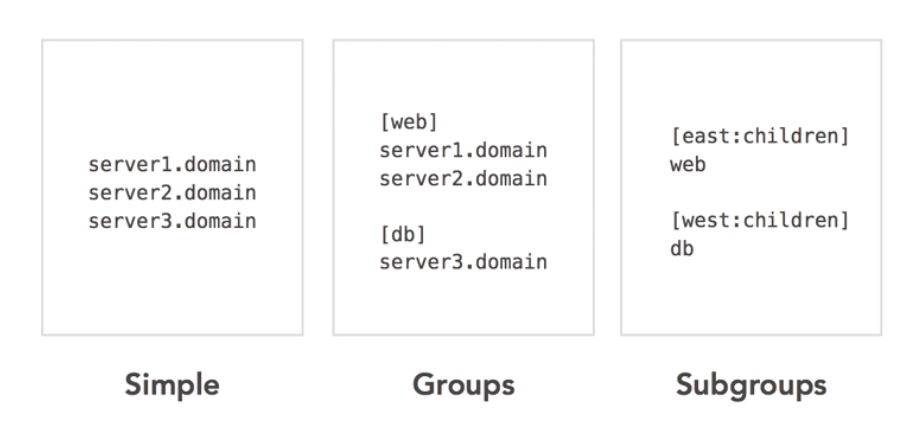

### Patterns
* host or groups are expressed in pattern 
* support regular expression 
* usage : inclusive, exclusive or unioned 
    e.g. include east and west group but not web group 
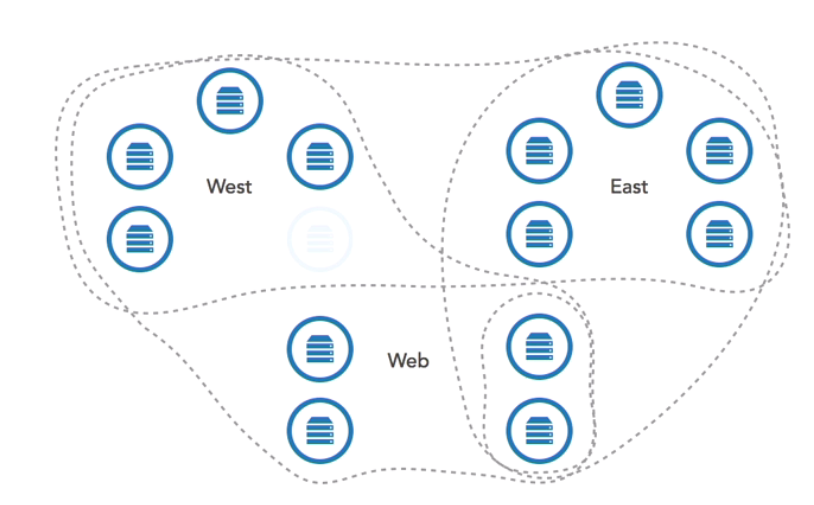

### Inventory file
* contains data related to a host in a key-value pair 
* usage 
    * task argument 
    * templates of config file
    * connection argument 
* Expessed as 
    * inventory file 
    * group files 
* scopped as 
    * host 
    * group
    * group of group 
    * all groups
    * more specific value wins
* sourced 
    * static : simple to start
    * dynamic : cloud sourced, containers/VM , ssh_config  
    
### Taks 
* descriptive of desired state 
* expressed in YAML
* just enough abstraction 
* Task control
    * looping : repeat a list of tasks
    * priviledge escalation : sudo for root access
    * contional expression : if the task is to be executed 
    
### Modules 
* there are many module prebuilt like packages in python
* modules can be extened to add custom feature 
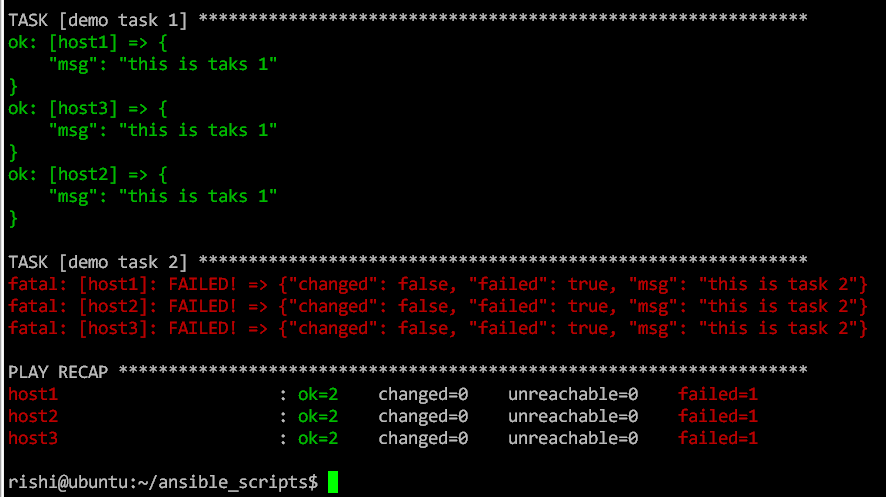

## playbook 
* YAML formatted files, contains a collection of one or more plays 
* play : list of target hosts 
* usage : `ansible-playbook --help` 
* step 1 : create an inventory file
    ```
    [groupA]
        host1
        host2
        host3

    [groupB]
            host4
            host5
            host6

    [all:vars]
            ansible_connection=local
    ```
* step 2 : create a demo play file 
   ```
    ---
    - name: "do a demo"     # name of the play
      hosts: groupA         # target group from inventory file

      tasks:                # task spec 
       - name: demo task 1
         debug:             # module to demo   
          msg: "this is taks 1" # prints message 

       - name: demo task 2
         debug:
          msg: "this is task 2"

    - name: "do another demo"
      hosts: groupB

      tasks:
       - name: demo task 3
         debug:
          msg: "this is taks 3"

       - name: demo task 4
         debug:
          msg: "this is task 4"

     ```
* plays and tasks are executed Top-to-bottom
* Step 3: Execute playbook (tell ansible the inventory file to use and the playbook file to parse)
    ```
    ansible-playbook -i inventory_hosts demoplays.yaml
    ```
* execution will abort if an error takes place
* faulty hosts are removed from the inventory 
* to simulate this change task 2 to __error__ module from __debug__. this will simulate as an error takes place at task 2 and remaining tasks i.e. 3,4 will be suspened. 
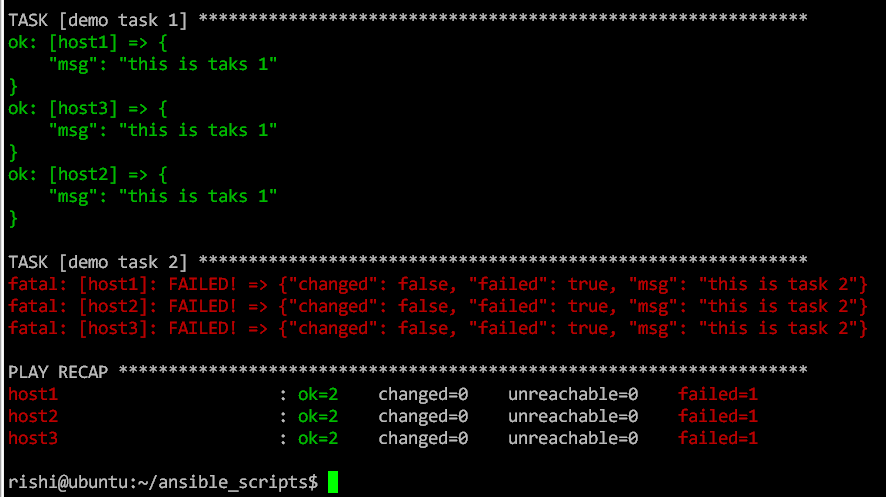

## Task cnditionals 
to solve the problem encountered in last case, a boolean clause is attached. 

## Example play
write a play book that 
1. single play with single task 
2. install pip module 
3. install numpy using pip
* __Pre-cheks__
    1. ssh is running on all workers
    2. password is set 
    3. ssh can access root. edit `\etc\ssh\sshd_config` ,  set `PermitRootLogin yes` and restart ssh service : `\etc\init.d\ssh restart`
    4. try ssh the hosts ans perform key-exchange 
    5. install __sshpass__ on manager 
* __Step 1__ : Create a inventory file `inv_workers`
    ```
    [workers]
        172.17.0.2
        172.17.0.3
        172.17.0.4
    [all:vars]
        ansible_connection=ssh
        ansible_user=root
        ansible_ssh_pass=password

    ```
* __step 2__: create a playbook file `play_numpy.yaml`
    ```
    ---
    - name: "install numpy"
      hosts: workers
      tasks:
       - name: install pip
         apt:
          name: python-pip
          install_recommends: yes

       - name: install numpy
         pip:
          name: numpy
    ```
* __Step3__ : run playbook
    ```
    ansible-playbook -i inv_workers play_numpy.yaml
    ```
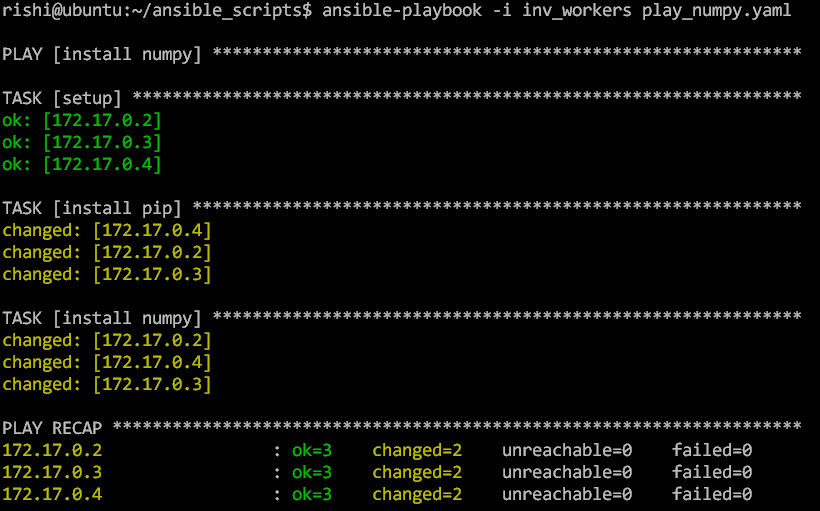

# Ansible Usage 
## Aparadigm shift in infra
* configuration management automation : hand management is too slow, config language is too technical 
* infrastructure provissioning : on-demand usage, less waste of resources 
* on-demand infrastructure : cloud, docker etc. 

## Orchastration automation 


